<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Boris Panes</em><br>

</div>

### Análisis de Datos: Tarea 01
#### Integrantes: 
` Mariangel Arrieta Giuseppe Lavarello Ingrid Solís Rosario Valderrama `

1. Importación de Librerias

In [1]:
import pandas as pd               #Manejo de datos en Tablas
import numpy as np
import matplotlib.pyplot as plt   #Creación de visualizaciones 
import seaborn as sns             #Creación de visualizaciones   

2. Cargar archivo

In [2]:
# Ruta relativa al archivo
ruta_archivo = r'.\Data\2023-03-08 Precios Casas RM.csv'
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades


3. Análisis exploratorio

In [3]:
#información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


In [4]:
#resumen estadistico de las variables numericas
df.describe()

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


In [5]:
#Dimensiones del df
df.shape

(7779, 12)

In [6]:
#Total de elementos únicos por cada columna.
df.nunique()

Price_CLP     1897
Price_UF      1801
Price_USD     1877
Comuna          51
Ubicacion     6620
Dorms           22
Baths           15
Built Area     573
Total Area    1099
Parking         26
id            7778
Realtor        278
dtype: int64

4. Limpieza de datos

In [7]:
#Verificar datos faltantes
df.isna().sum()

Price_CLP        0
Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms            0
Baths           65
Built Area     246
Total Area     208
Parking       2290
id               0
Realtor        595
dtype: int64

In [8]:
# Verificar datos duplicados
duplicados = df.duplicated().sum()

# Porcentaje de data duplicada
porcentaje = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicados} el numero de filas duplicadas representa {porcentaje.round(2)}% del total de la data.')

1 el numero de filas duplicadas representa 0.01% del total de la data.


In [9]:
# Borramos dato duplicado y creamos un nuevo df1
df1 = df.drop_duplicates(keep='first')

# Mostramos las primeras filas del df1
len(df1)

7778

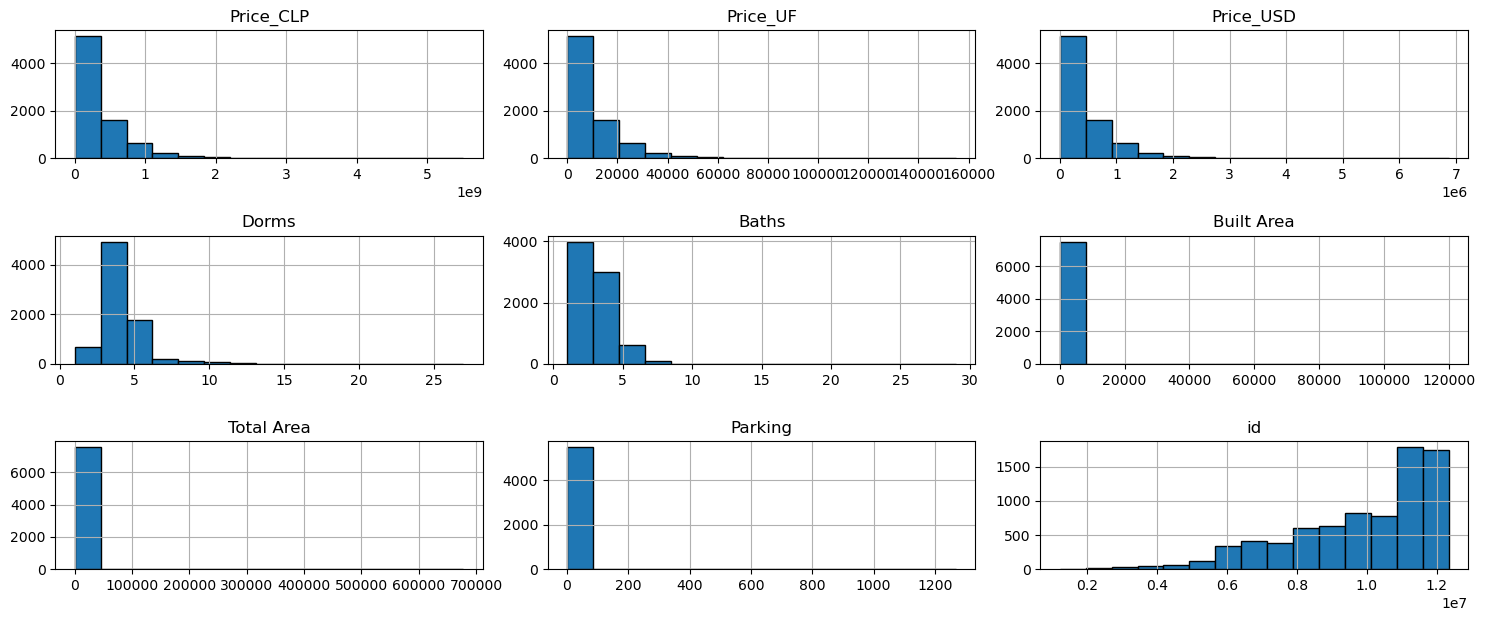

In [10]:
# Histograma de todas las columnas.
# Definir el tamaño de la figura para los histogramas
df1.hist(bins=15, figsize=(15, 10), layout=(5, 3), edgecolor='black')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

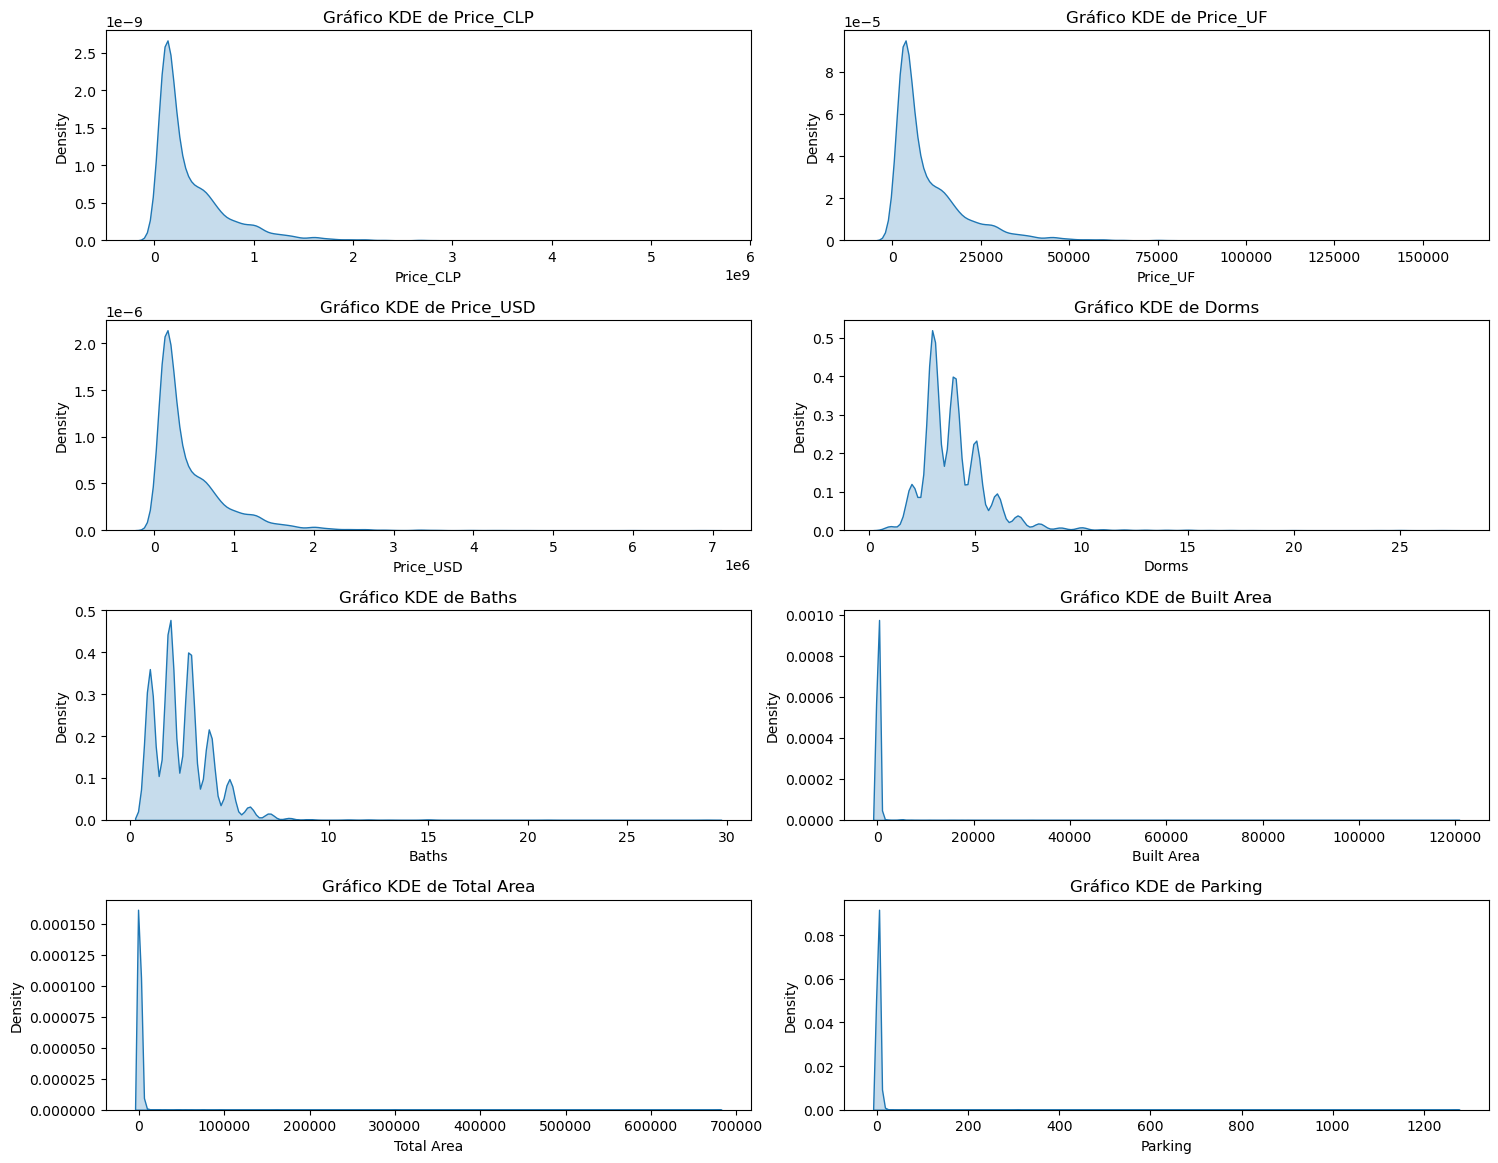

In [11]:
# Asegurarse de que las columnas sean numéricas
df1_numeric = df1.select_dtypes(include='number')

# Eliminar la columna 'ID'
df1_numeric = df1_numeric.drop(columns=['id'])

# Definir el tamaño de la figura para los gráficos KDE
plt.figure(figsize=(15, 20))

# Iterar sobre cada columna numérica para crear gráficos KDE
for i, column in enumerate(df1_numeric.columns, 1):
    plt.subplot(7, 2, i)  # Crear una cuadrícula de gráficos (7 filas, 2 columnas)
    sns.kdeplot(df1_numeric[column], fill=True)
    plt.title(f'Gráfico KDE de {column}')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

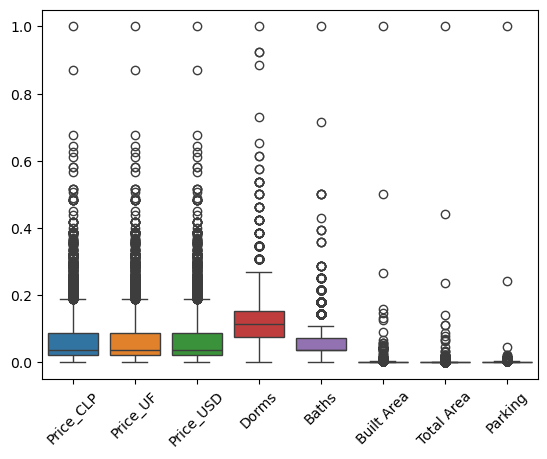

In [12]:
#Verificamos Outliers

# diagrama de caja para visualizar la distribución de todas las variables numéricas

# normalizar la escala
from sklearn.preprocessing import MinMaxScaler

# seleccionar columnas numéricas
num_columns = df[['Price_CLP', 'Price_UF', 'Price_USD', 'Dorms', 'Baths' , 'Built Area' , 'Total Area', 'Parking']]

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Crear df con datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)

plt.show()

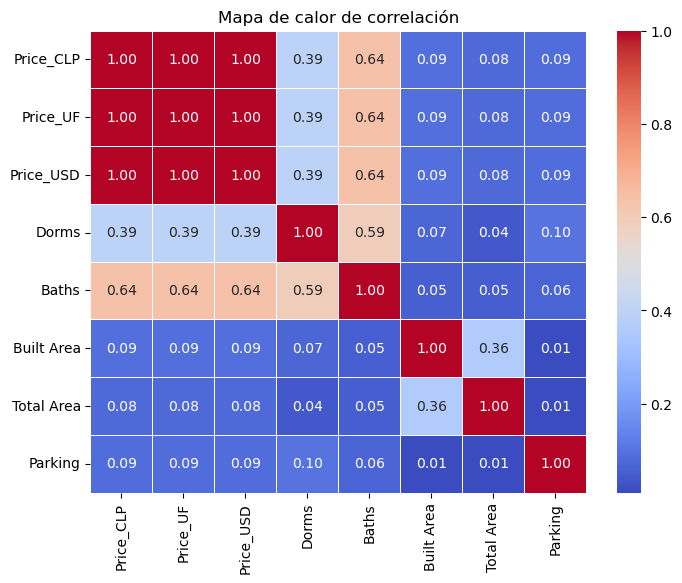

In [13]:
# Calcular la matriz de correlación
correlation_matrix = df1_numeric.corr(numeric_only=True)

# Crear un mapa de calor para mostrar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()